In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./YoloModel2ConfParamSweepCombined.csv')
df = df[df['ActualCars']!=0]
df['precision'] = df['ActualCars']/df['ModelCountCars']
df['diff'] = np.absolute(df['ActualCars']-df['ModelCountCars'])
df.sort_values(by='conf_thres', inplace = True)
df.to_csv('YoloModel2TestPrecisionScore.csv')
df.head(5)

,Videos,ActualCars,ModelCountCars,conf_thres,precision,diff
59,D:\Ivan\Test_data\Katipunan\test\VID_20200708_...,594,796,0.986,0.746231,202
60,D:\Ivan\Test_data\Katipunan\test\VID_20200711_...,618,743,0.986,0.831763,125
61,D:\Ivan\Test_data\Katipunan\test\VID_20200714_...,602,751,0.986,0.801598,149
62,D:\Ivan\Test_data\Katipunan\test\VID_20200717_...,674,754,0.986,0.893899,80
63,D:\Ivan\Test_data\Katipunan\test\VID_20200720_...,598,715,0.986,0.836364,117


In [38]:
df1 = df[['conf_thres','precision']]
df2= df[['conf_thres','diff']]

# Getting the precision

In [39]:
df1.groupby(by=["conf_thres"]).mean()

,precision
conf_thres,
0.9860,0.834465
0.9981,0.946593
0.9986,0.989754
0.9987,1.003478
0.9988,1.035353
0.9989,1.050588


# Gettting the difference

In [40]:
df2.groupby(by=["conf_thres"]).mean()

,diff
conf_thres,
0.9860,123.500000
0.9981,89.789474
0.9986,89.800000
0.9987,88.450000
0.9988,61.550000
0.9989,64.750000


# Plotting

10
20
20
20


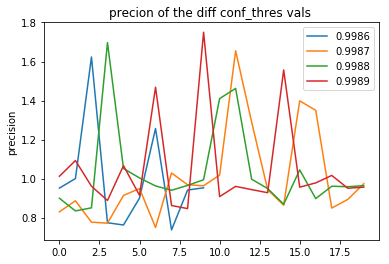

In [41]:
conf_thres = [0.9986,0.9987,0.9988,0.9989]
for conf in conf_thres:
    df_plt = df[df['conf_thres']==conf]
    x = np.arange(df_plt['precision'].size)
    y = df_plt['precision']
    print(len(x))
    plt.plot(x,y,label = str(conf))
plt.xlabel('')
plt.ylabel('precision')
plt.title('precion of the diff conf_thres vals ')
plt.legend()
plt.show()


# Min Max scaler


In [42]:
df_plt = df[df['conf_thres']==0.9981].sort_values(by=['Videos'])
df_plt

,Videos,ActualCars,ModelCountCars,conf_thres,precision,diff
89,D:/Ivan/Test_data/Katipunan/test/VID_20200602_...,540,618,0.9981,0.873786,78
90,D:/Ivan/Test_data/Katipunan/test/VID_20200605_...,588,530,0.9981,1.109434,58
94,D:/Ivan/Test_data/Katipunan/test/VID_20200620_...,705,785,0.9981,0.898089,80
84,D:\Ivan\Test_data\Katipunan\test/VID_20200509_...,313,344,0.9981,0.909884,31
85,D:\Ivan\Test_data\Katipunan\test/VID_20200512_...,284,307,0.9981,0.925081,23
86,D:\Ivan\Test_data\Katipunan\test/VID_20200515_...,336,233,0.9981,1.442060,103
87,D:\Ivan\Test_data\Katipunan\test/VID_20200521_...,386,530,0.9981,0.728302,144
88,D:\Ivan\Test_data\Katipunan\test/VID_20200530_...,439,597,0.9981,0.735343,158
92,D:\Ivan\Test_data\Katipunan\test/VID_20200614_...,703,646,0.9981,1.088235,57
95,D:\Ivan\Test_data\Katipunan\test/VID_20200705_...,677,802,0.9981,0.844140,125


[[0.67662566 0.52196837 0.97012302 0.19507909 0.13005272 0.
  0.52196837 0.6397188  0.7258348  1.         0.92618629 0.91564148
  0.50966608 0.58347979 0.70474517 0.82425308 0.90685413 0.69595782
  0.78383128]]
[[0.53954306 0.62390158 0.82952548 0.14059754 0.08963093 0.18101933
  0.26889279 0.36203866 0.82601054 0.78031634 0.6344464  0.67662566
  0.64850615 0.77504394 0.64147627 0.66959578 0.7029877  0.66608084
  0.60456942]]


C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


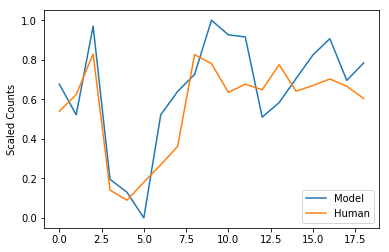

In [43]:
from sklearn.preprocessing import MinMaxScaler
x = np.arange(df_plt['ModelCountCars'].size)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit(np.reshape(df_plt['ModelCountCars'].values,(len(x),-1), order='C'))
scaledModel = scaler.transform(np.reshape(df_plt['ModelCountCars'].values,(1,len(x)), order='C'))
scaledHuman = scaler.transform(np.reshape(df_plt['ActualCars'].values,(1,len(x)),order='C'))
print(scaledModel)
print(scaledHuman)
plt.plot(x,scaledModel[0],label='Model')
plt.plot(x,scaledHuman[0],label='Human')
plt.ylabel('Scaled Counts')
plt.legend()
plt.show()


In [35]:
maxMinArr = [np.reshape(scaledModel,(20,1)),np.reshape(scaledHuman,(20,1))]
dfMaxMin = pd.DataFrame(maxMinArr)
print(dfMaxMin)

ValueError: Must pass 2-d input